# bit.ly/day11_notebook

**This is a heading**

**Importing the libraries**

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

**Load the dataset**  
**Fashion MNIST**  
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.  
Each example is a 28x28 grayscale image, associated with a label from 10 classes.

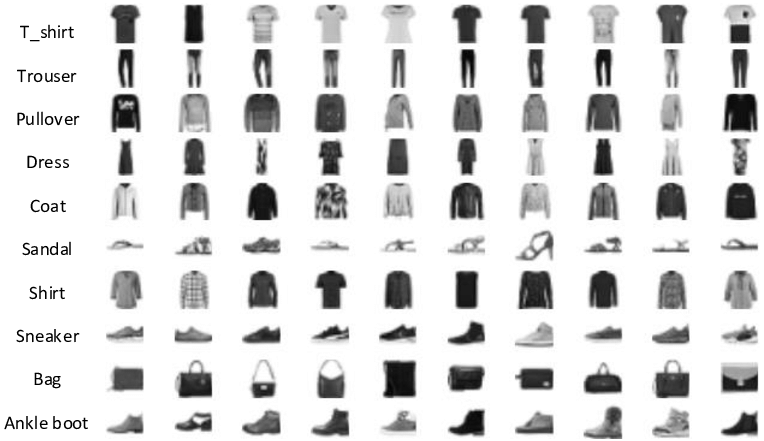

In [2]:
# Load the fashion_mnist dataset from tensorflow.keras.datasets
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

**Display Sample Images**

'Ankle boot'

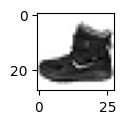

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1, 1))
plt.imshow(X_train[0], cmap=plt.cm.binary)
class_names[y_train[0]]

In [ ]:
X_train[0].shape

(28, 28)

**Let's see more samples**  

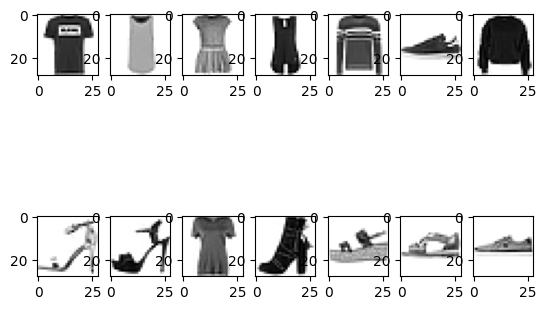

In [ ]:
for i in range(1, 15):
    plt.subplot(2, 7, i)
    plt.imshow(X_train[i], cmap=plt.cm.binary)

**Scaling the inputs**  
Since we are going to train the neural network using Gradient Descent, we must scale the input features.  
For simplicity, we just
scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this also converts them to floats)

In [ ]:
X_train[0]

In [9]:
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
X_train[0]

**Creating the Neural Network Architecture**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [12]:
model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

**Visualize the model architecture**  
You can use the **summary()** function to see the model information.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


The first **flatten** layer has 1024 neurons, ie the 32x32 image is flattened into 1024 units.  

You can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch
it by name using the **layers** attribute of the model.

In [ ]:
model.layers

In [14]:
model.layers[0].name

'flatten'

**Compiling the Model**  
After a model is created, you must call its **compile()** method to specify the *loss function* and the *optimizer* to use.  
Optionally, you can also specify a list of extra *metrics* to
compute during training and evaluation.  
  
loss function - sparse_categorical_crossentropy  
optimizer - sgd  
mertics - accuracy

In [16]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics="accuracy")

**Training the model**

In [17]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6859 - accuracy: 0.7749 - val_loss: 0.5215 - val_accuracy: 0.8183
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4770 - accuracy: 0.8336 - val_loss: 0.4648 - val_accuracy: 0.8356
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4328 - accuracy: 0.8485 - val_loss: 0.4430 - val_accuracy: 0.8420
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4071 - accuracy: 0.8568 - val_loss: 0.4255 - val_accuracy: 0.8488
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3879 - accuracy: 0.8640 - val_loss: 0.4109 - val_accuracy: 0.8541
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3724 - accuracy: 0.8698 - val_loss: 0.3996 - val_accuracy: 0.8581
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3592 - accuracy: 0.8734 - val_loss: 0.3900 - val_accuracy:

The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).  
If you create a Pandas DataFrame using this dictionary and call its plot()
method, you get the learning curves

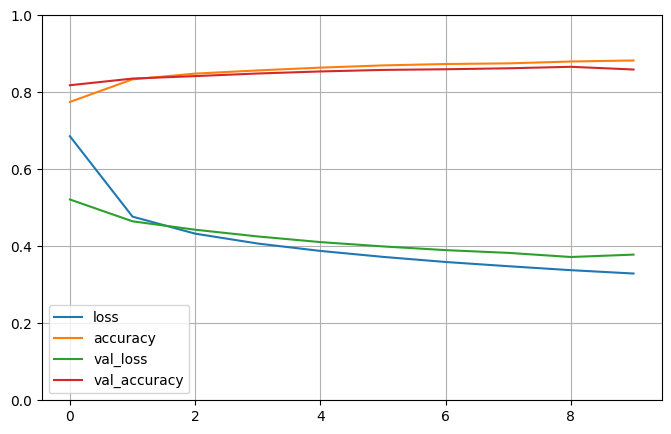

In [18]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Testing the model**

You can compute the **accuracy** using the **evaluate()** function.

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3608 - accuracy: 0.8708


[0.36077645421028137, 0.8708000183105469]

**Making new predictions**  
We can use the model’s **predict()** method to make predictions on new instances.  
The model estimates one probability per class, from class 0 to class 9.

Text(0.5, 1.0, 'Ankle boot')

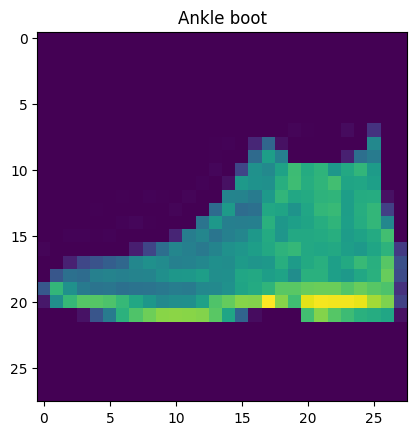

In [19]:
plt.imshow(X_test[0])
plt.title(class_names[y_test[0]])

In [20]:
y_prob = model.predict(X_test)
y_prob[0]


313/313 [==============================] - 1s 2ms/step


array([2.8347378e-05, 4.1058402e-06, 2.2876440e-05, 3.5510882e-05,
       5.2358873e-06, 4.0894028e-02, 7.2743132e-05, 7.2777390e-02,
       1.7023333e-03, 8.8445741e-01], dtype=float32)

To get the predicted class, you can use the **np.argmax()** function to get index of the largest probability.

In [21]:
predicted_class = np.argmax(y_prob[0])
predicted_class

9

In [23]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [22]:
np.array(class_names)[predicted_class]

'Ankle boot'

**Saving and Restoring a Model**

Saving the Keras model

In [24]:
model.save("my_keras_model.h5")

Loading a saved model

In [25]:
loaded_model = keras.models.load_model("my_keras_model.h5")

Making predictions with the loaded model.

In [26]:
y_pred = loaded_model.predict(X_test)
predicted_class = np.argmax(y_prob[0])
np.array(class_names)[predicted_class]

313/313 [==============================] - 1s 2ms/step


'Ankle boot'

# Feedback - bit.ly/day11_feedback